In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [53]:
train = pd.read_csv(r'C:\New_Folder\GA\Projects\Titanic\train.csv')
test = pd.read_csv(r'C:\New_Folder\GA\Projects\Titanic\test.csv')

In [3]:
print (train.shape)
print (test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
for column in train.columns:
    if train[column].isnull().sum() > 0:
        print ("Percentage of missing values in {} is: {}".format(column, (train[column].isnull().sum()/len(train))*100))

Percentage of missing values in Age is: 19.865319865319865
Percentage of missing values in Cabin is: 77.10437710437711
Percentage of missing values in Embarked is: 0.22446689113355783


## To check our target

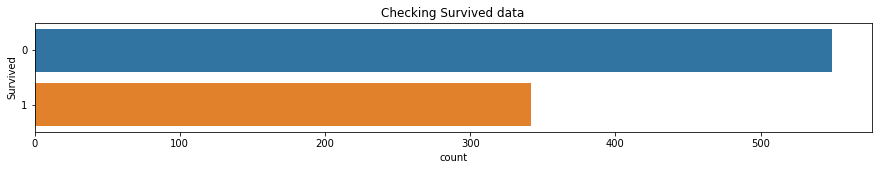

0    549
1    342
Name: Survived, dtype: int64

In [14]:
plt.figure(figsize=(15,2))
sns.countplot(y='Survived', data = train)
plt.title("Checking Survived data")
plt.show()
train['Survived'].value_counts()

## Feature PClass

Text(0.5, 1.0, 'Sex')

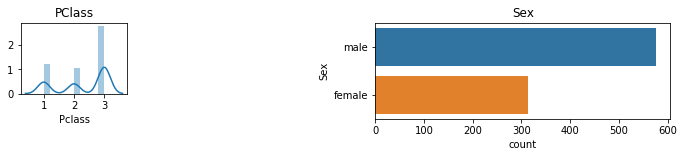

In [15]:
plt.figure(figsize=(18,6))

plt.subplot2grid((4,8), (0,0))
sns.distplot(train['Pclass'])
plt.title("PClass")

plt.subplot2grid((3,3), (0,1))
sns.countplot(y='Sex', data = train, orient="h")
plt.title("Sex")

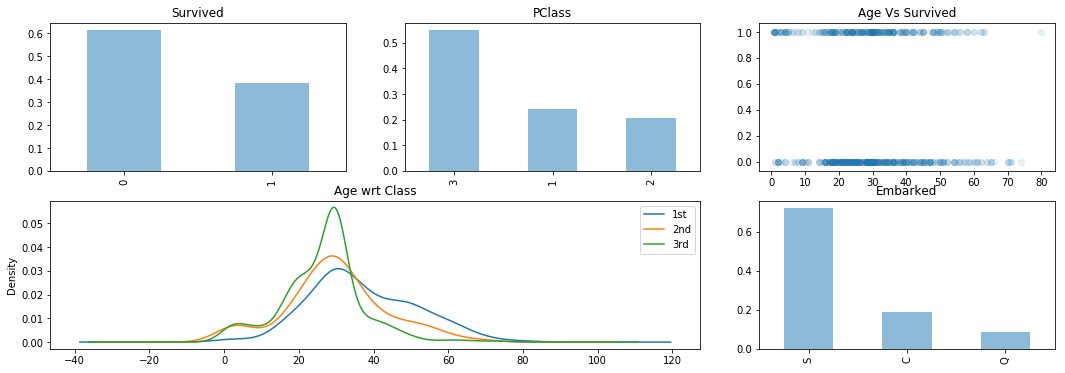

In [16]:
fig2= plt.figure(figsize=(18,6))

plt.subplot2grid((2,3),(0,0))
train['Survived'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
train['Pclass'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("PClass")

plt.subplot2grid((2,3),(0,2))
plt.scatter (train['Age'], train['Survived'],alpha = 0.1)
#train['Pclass'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Age Vs Survived")

plt.subplot2grid((2,3),(1,0), colspan = 2,)
for x in [1,2,3]:
    train['Age'][train['Pclass']==x].plot(kind = 'kde')
plt.title("Age wrt Class")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((2,3),(1,2))
train['Embarked'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Embarked")

plt.show()

In [17]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

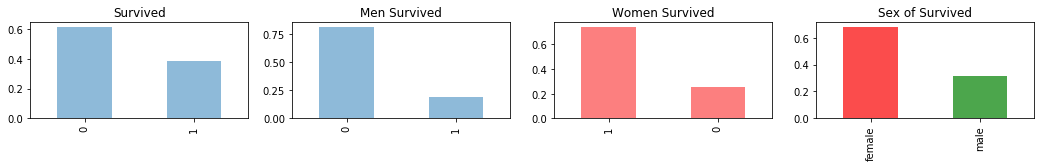

In [18]:
female_color = "#FA0000"

fig = plt.figure(figsize=(18,6))

plt.subplot2grid((3,4),(0,0))
train['Survived'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Survived")


plt.subplot2grid((3,4),(0,1))
train['Survived'][train['Sex']=='male'].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
train['Survived'][train['Sex']=='female'].value_counts(normalize=True ).plot(kind="bar",alpha = 0.5, color = female_color)
plt.title("Women Survived")

plt.subplot2grid((3,4),(0,3))
train['Sex'][train['Survived']==1].value_counts(normalize=True).plot(kind = 'bar', alpha = 0.7, color = [female_color, 'g'])
plt.title("Sex of Survived")

#plt.subplot2grid((3,4),(1,0))
#x =[1,2,3]
#for x in  

plt.show()

https://www.youtube.com/watch?v=fS70iptz-XU

Text(0.5, 1.0, 'Poor Women survived')

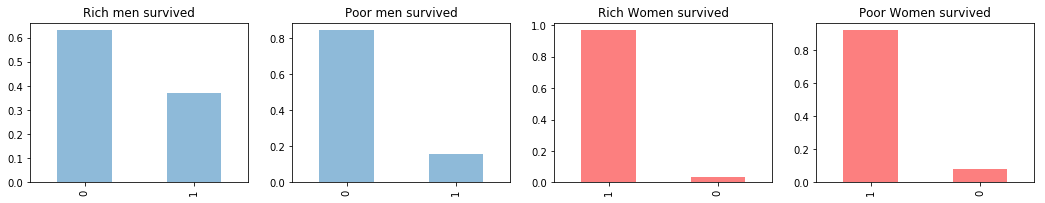

In [19]:
female_color = "#FA0000"

fig = plt.figure(figsize=(18,10))

plt.subplot2grid((3,4),(0,0))
train['Survived'][(train['Sex']=='male') & (train['Pclass']==1)].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Rich men survived")

plt.subplot2grid((3,4),(0,1))
train['Survived'][(train['Sex']=='male') & (train['Pclass']==2)].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5)
plt.title("Poor men survived")

plt.subplot2grid((3,4),(0,2))
train['Survived'][(train['Sex']=='female') & (train['Pclass']==1)].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5, color = female_color)
plt.title("Rich Women survived")

plt.subplot2grid((3,4),(0,3))
train['Survived'][(train['Sex']=='female') & (train['Pclass']==2)].value_counts(normalize=True ).plot(kind="bar", alpha = 0.5, color = female_color)
plt.title("Poor Women survived")



## Feature Engineering

#Combined train and test data

In [56]:
#train_test_data = pd.concat([train, test])
train_test_data = [train, test]


# Converted Sex and Embarked column from categorical to numerical

In [57]:
#train_test_data = pd.get_dummies(train_test_data, columns=['Sex','Embarked'])
mapping_embarked = {'S':1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].map(mapping_embarked)

In [58]:
test['Embarked'] = test['Embarked'].map(mapping_embarked)

In [60]:
train['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [62]:
test['Embarked'].value_counts()

1    270
2    102
3     46
Name: Embarked, dtype: int64

## Creating new column as Title from Name

In [63]:
#train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [64]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Don           1
Jonkheer      1
Mme           1
Capt          1
Lady          1
Countess      1
Sir           1
Name: Title, dtype: int64

In [33]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [65]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [66]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

## Adding missing value in Age column

In [12]:
#train['Age'].fillna(train.groupby('Title')['Age'].mean(),inplace = True)
#test['Age'].fillna(train.groupby('Title')['Age'].mean(), inplace = True)

In [67]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [68]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [69]:
train[['Title','Age']]

,Title,Age
0,0,22.0
1,2,38.0
2,1,26.0
3,2,35.0
4,0,35.0
...,...,...
886,3,27.0
887,1,19.0
888,1,21.0
889,0,26.0


## Adding missing value in Emarked column

In [70]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [71]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age']<=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age']<=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age']<=55), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 55, 'Age'] = 4

In [72]:
train['Age'].value_counts()

2.0    336
1.0    255
3.0    155
0.0    105
4.0     40
Name: Age, dtype: int64

In [73]:
test.Age.value_counts()

2.0    139
1.0    134
3.0     87
0.0     39
4.0     19
Name: Age, dtype: int64

In [74]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

## Sex

In [75]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

# Fare

In [76]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace =True)

## Family Size

In [77]:
train['Sib_Par'] = train['Parch'] + train['SibSp']
test['Sib_Par'] = test['Parch'] + test['SibSp']
#train_test_data['Sib_Par'] = train_test_data['Parch'] + train_test_data['SibSp']
#train_test_data['Sib_Par']

## Dropping columns from train and test

In [78]:
train.drop ('Name',axis =1, inplace = True)
train.drop ('Ticket', axis =1, inplace = True)
train.drop ('Cabin', axis =1, inplace = True)
train.drop('Parch', axis =1, inplace = True)
train.drop('SibSp', axis =1, inplace = True)
#train.drop('PassengerId', axis = 1, inplace = True)

KeyError: "['PassengerId'] not found in axis"

In [79]:
test.drop ('Name',axis =1, inplace = True)
test.drop ('Ticket', axis =1, inplace = True)
test.drop ('Cabin', axis =1, inplace = True)
test.drop('Parch', axis =1, inplace = True)
test.drop('SibSp', axis =1, inplace = True)

In [80]:
train['Embarked'].value_counts()

1.0    646
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [39]:
train_test_data.shape

(1309, 10)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null float64
Title       891 non-null int64
Sib_Par     891 non-null int64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [82]:
#train = train_test_data.iloc[:891,:]
#test = train_test_data.iloc[891:,:]

In [83]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Sib_Par
0,0,3,0,1.0,7.2500,1.0,0,1
1,1,1,1,3.0,71.2833,2.0,2,1
2,1,3,1,1.0,7.9250,1.0,1,0
3,1,1,1,2.0,53.1000,1.0,2,1
4,0,3,0,2.0,8.0500,1.0,0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,13.0000,1.0,3,0
887,1,1,1,1.0,30.0000,1.0,1,0
888,0,3,1,1.0,23.4500,1.0,1,3
889,1,1,0,1.0,30.0000,2.0,0,0


In [85]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Sib_Par
0,892,3,0,2.0,7.8292,3,0,0
1,893,3,1,3.0,7.0000,1,2,1
2,894,2,0,4.0,9.6875,3,0,0
3,895,3,0,2.0,8.6625,1,0,0
4,896,3,1,1.0,12.2875,1,2,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,8.0500,1,0,0
414,1306,1,1,3.0,108.9000,2,3,0
415,1307,3,0,3.0,7.2500,1,0,0
416,1308,3,0,2.0,8.0500,1,0,0


In [52]:
#test.drop('Survived', axis = 1, inplace = True)
#test.drop('SibSp', axis =1, inplace = True)

C:\Users\RG186032\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
Fare          417 non-null float64
Pclass        418 non-null int64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Sib_Par       418 non-null int64
dtypes: float64(2), int64(2), uint8(5)
memory usage: 18.4 KB


In [55]:
test['Age'].fillna(train['Age'].mean(), inplace = True)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

C:\Users\RG186032\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [86]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Sib_Par        0
dtype: int64

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null float64
Title       891 non-null int64
Sib_Par     891 non-null int64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


## Modelling

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True, random_state=0)

In [89]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [90]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs =13, scoring = scoring )
print ("Score Array from KNN\n",score)

Score Array from KNN
 [0.76666667 0.76404494 0.75280899 0.7752809  0.78651685 0.74157303
 0.79775281 0.75280899 0.75280899 0.80898876]


In [91]:
 round(np.mean(score)*100,2)

76.99

## Decission Tree

In [92]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
#score = cross_val_score(clf, train_data, target,cv= k_fold, n_jobs=1, scoring = scoring)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs =13, scoring = scoring )
print ("Score Array from Decission Tree\n",score)

Score Array from Decission Tree
 [0.76666667 0.7752809  0.80898876 0.7752809  0.80898876 0.78651685
 0.84269663 0.82022472 0.7752809  0.82022472]


In [93]:
round(np.mean(score)*100,2)

79.8

## Randomforset

In [94]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print ("Score Array from Randomforset Tree\n",score)

Score Array from Randomforset Tree
 [0.74444444 0.85393258 0.82022472 0.80898876 0.87640449 0.76404494
 0.79775281 0.80898876 0.7752809  0.79775281]


In [95]:
round(np.mean(score)*100,2)

80.48

In [96]:
clf= SVC()
scoring = 'accuracy'
score= cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print ("Score Array from SVM\n",score)

Score Array from SVM
 [0.75555556 0.80898876 0.80898876 0.79775281 0.79775281 0.78651685
 0.80898876 0.79775281 0.7752809  0.83146067]


In [97]:
round(np.mean(score)*100,2)

79.69

## Testing

In [105]:
clf = RandomForestClassifier(n_estimators =13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
pred = clf.predict(test_data)

In [107]:
submission_V2 = pd.DataFrame({"PassengerId":test['PassengerId']  ,"Survived": pred})

submission_V2.to_csv('submission_V2.csv', index=False)